In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d mrwellsdavid/unsw-nb15

 99% 148M/149M [00:05<00:00, 33.6MB/s]
100% 149M/149M [00:05<00:00, 27.9MB/s]


In [ ]:
with zipfile.ZipFile("/content/unsw-nb15.zip", "r") as zip_ref:
    # Extract all contents of the zip file to the current working directory
    zip_ref.extractall()

In [ ]:
df_test = pd.read_csv("/content/UNSW_NB15_testing-set.csv")
df_train = pd.read_csv("/content/UNSW_NB15_training-set.csv")
df = pd.concat([df_test, df_train])

In [ ]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
# fueturs of the dataset
print(df.columns.tolist())
print("number of featurs are: ", len(df.columns.tolist()))

['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']
number of featurs are:  45


In [ ]:
# check if there nulls in the dataset
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
#number of values of each feature
values_fueture = {key:len(df[key].unique()) for key in df.columns.tolist()}

In [ ]:
values_fueture

{'id': 175341,
 'dur': 109945,
 'proto': 133,
 'service': 13,
 'state': 11,
 'spkts': 646,
 'dpkts': 627,
 'sbytes': 9382,
 'dbytes': 8653,
 'rate': 115763,
 'sttl': 13,
 'dttl': 9,
 'sload': 121356,
 'dload': 116380,
 'sloss': 490,
 'dloss': 476,
 'sinpkt': 114318,
 'dinpkt': 110270,
 'sjit': 117101,
 'djit': 114861,
 'swin': 22,
 'stcpb': 114473,
 'dtcpb': 114187,
 'dwin': 19,
 'tcprtt': 63878,
 'synack': 57366,
 'ackdat': 53248,
 'smean': 1377,
 'dmean': 1362,
 'trans_depth': 14,
 'response_body_len': 2819,
 'ct_srv_src': 57,
 'ct_state_ttl': 7,
 'ct_dst_ltm': 52,
 'ct_src_dport_ltm': 52,
 'ct_dst_sport_ltm': 35,
 'ct_dst_src_ltm': 58,
 'is_ftp_login': 4,
 'ct_ftp_cmd': 4,
 'ct_flw_http_mthd': 11,
 'ct_src_ltm': 52,
 'ct_srv_dst': 57,
 'is_sm_ips_ports': 2,
 'attack_cat': 10,
 'label': 2}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,257673.0,7.281182e+04,4.892992e+04,1.0,32210.000000,64419.000000,1.109230e+05,1.753410e+05
dur,257673.0,1.246715e+00,5.974305e+00,0.0,0.000008,0.004285,6.857770e-01,5.999999e+01
spkts,257673.0,1.977714e+01,1.359472e+02,1.0,2.000000,4.000000,1.200000e+01,1.064600e+04
dpkts,257673.0,1.851470e+01,1.119860e+02,0.0,0.000000,2.000000,1.000000e+01,1.101800e+04
sbytes,257673.0,8.572952e+03,1.737739e+05,24.0,114.000000,528.000000,1.362000e+03,1.435577e+07
dbytes,257673.0,1.438729e+04,1.461993e+05,0.0,0.000000,178.000000,1.064000e+03,1.465753e+07
rate,257673.0,9.125391e+04,1.603446e+05,0.0,30.789277,2955.664893,1.250000e+05,1.000000e+06
sttl,257673.0,1.800009e+02,1.024883e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,257673.0,8.475496e+01,1.127621e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,257673.0,7.060869e+07,1.857313e+08,0.0,12318.004880,743942.312500,8.000000e+07,5.988000e+09


## Check objects and changet to catigorical type

In [ ]:
# to_catogories function to transfer data
def to_catigories(data, feature):
  one_hot_encoded = pd.get_dummies(data[feature], prefix=feature)
  data = pd.concat([data, one_hot_encoded], axis=1)
  return data.drop(feature, axis=1)

In [ ]:
# proto
df["proto"].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [ ]:
df = to_catigories(df, "proto")

In [ ]:
#service
df['service'].unique()

array(['-', 'ftp', 'smtp', 'snmp', 'http', 'ftp-data', 'dns', 'ssh',
       'radius', 'pop3', 'dhcp', 'ssl', 'irc'], dtype=object)

the name "-" represents other services

In [ ]:
df = to_catigories(df, "service")

In [ ]:
# state
df["state"].unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'RST', 'PAR', 'URN', 'no',
       'ACC', 'CLO'], dtype=object)

In [ ]:
df = to_catigories(df, "state")

In [ ]:
# attack_cat
df['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

### attack_cat
The attack category represents the category of each attack, so in reality there is no characteristic for the attack category, the next step is to remove this characteristic.

In [ ]:
df = df.drop("attack_cat", axis=1)

In [ ]:
#id
len(df["id"]) == len(df["id"].unique())

False

The reason why many individuals take the same identifier, after concatenating two data sets (the training data set and the test data set), is that it is necessary to delete them!

In [ ]:
df = df.drop("id", axis=1)

In [ ]:
df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,0,0,0,0,1,0,0,0,0,0
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,0,0,0,1,0,0,0,0,0,0
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,0,0,1,0,0,0,0,0
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,0,0,1,0,0,0,0,0


## check labels

In [ ]:
df["label"].unique()

array([0, 1])

Data is labled between two types normal and anomally

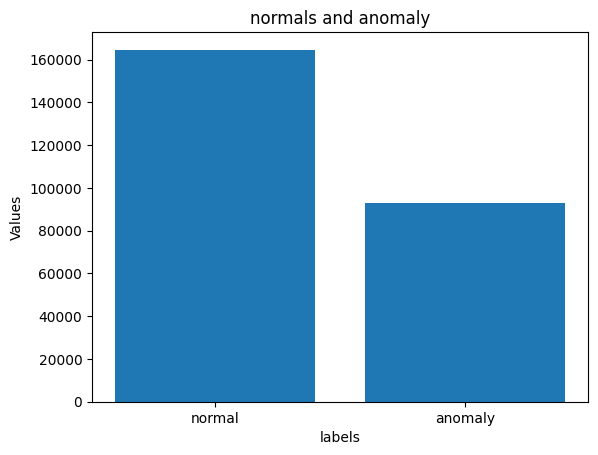

In [ ]:
#data equilibration
labels = ["normal", "anomaly"]
values = [len(df[df["label"]==1]), len(df[df["label"]==0])]
plt.bar(labels, values)
plt.xlabel('labels')
plt.ylabel('Values')
plt.title("normals and anomaly")
plt.show()

In [ ]:
df = pd.concat([df[df['label']==1][:len(df[df['label']==0])], df[df['label']==0]])

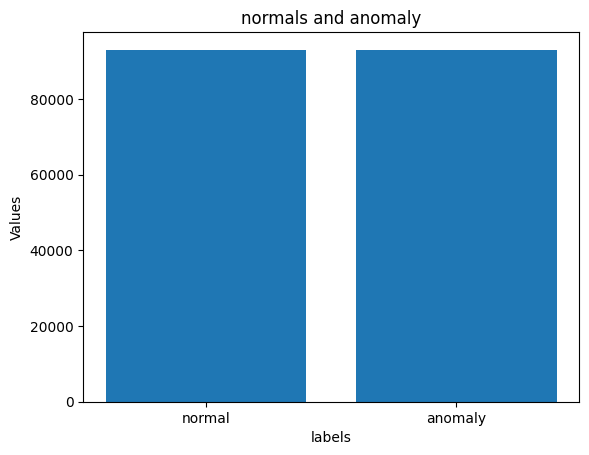

In [ ]:
#data equilibration
labels = ["normal", "anomaly"]
values = [len(df[df["label"]==1]), len(df[df["label"]==0])]
plt.bar(labels, values)
plt.xlabel('labels')
plt.ylabel('Values')
plt.title("normals and anomaly")
plt.show()

In [ ]:
#save processed data
df.to_csv("/content/drive/MyDrive/data security, mini project/UNSW_NB15/processedDataset.csv", index=False)

# Use Naive base algorithm

In [ ]:
#load data
data=pd.read_csv("/content/drive/MyDrive/data security, mini project/UNSW_NB15/processedDataset.csv")

In [ ]:
label = data["label"]
data = data.drop("label", axis=1)

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, label, test_size=0.2, random_state=42)

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = naive_bayes_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6437903225806452
Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74     18611
           1       1.00      0.29      0.45     18589

    accuracy                           0.64     37200
   macro avg       0.79      0.64      0.59     37200
weighted avg       0.79      0.64      0.59     37200



In [ ]:
#save the model
model_filename = '/content/drive/MyDrive/data security, mini project/UNSW_NB15/UNSW-NB15_with_NB.pkl'
joblib.dump(naive_bayes_classifier, model_filename)

['/content/drive/MyDrive/data security, mini project/UNSW_NB15/UNSW-NB15_with_NB.pkl']

In [ ]:
#load the model
loaded_model = joblib.load('/content/drive/MyDrive/data security, mini project/UNSW_NB15/UNSW-NB15_with_NB.pkl')

# Tain the model using LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [ ]:
n_hidden_units = 50  # Number of LSTM units
n_epochs = 30
batch_size = 32

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
model = Sequential()
model.add(LSTM(n_hidden_units, input_shape=(1, 196)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/30
4650/4650 [==============================] - 39s 6ms/step - loss: 0.2043 - accuracy: 0.8909 - val_loss: 0.1829 - val_accuracy: 0.9001
Epoch 2/30
4650/4650 [==============================] - 27s 6ms/step - loss: 0.1796 - accuracy: 0.9038 - val_loss: 0.1760 - val_accuracy: 0.9074
Epoch 3/30
4650/4650 [==============================] - 26s 6ms/step - loss: 0.1746 - accuracy: 0.9084 - val_loss: 0.1735 - val_accuracy: 0.9098
Epoch 4/30
4650/4650 [==============================] - 30s 6ms/step - loss: 0.1714 - accuracy: 0.9107 - val_loss: 0.1707 - val_accuracy: 0.9120
Epoch 5/30
4650/4650 [==============================] - 27s 6ms/step - loss: 0.1694 - accuracy: 0.9129 - val_loss: 0.1705 - val_accuracy: 0.9109
Epoch 6/30
4650/4650 [==============================] - 27s 6ms/step - loss: 0.1677 - accuracy: 0.9140 - val_loss: 0.1672 - val_accuracy: 0.9159
Epoch 7/30
4650/4650 [==============================] - 26s 6ms/step - loss: 0.1662 - accuracy: 0.9149 - val_loss: 0.1677 - val_ac

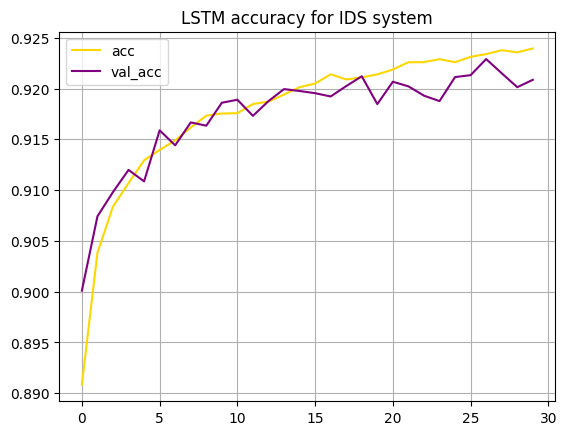

In [ ]:
plt.grid(True, which='both')
plt.plot(hist.history['accuracy'], color='gold')
plt.plot(hist.history['val_accuracy'], color='purple')
plt.title('LSTM accuracy for IDS system')
plt.legend(['acc', 'val_acc'])
plt.savefig("/content/drive/MyDrive/data security, mini project/UNSW_NB15/UNSW_NB15_LSTM_accuracy.png", transparent=True)
plt.show()

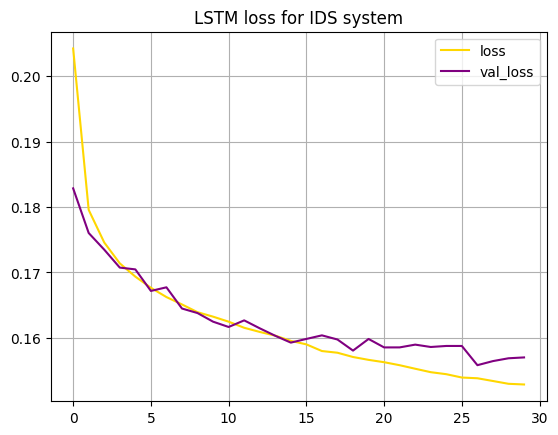

In [ ]:
plt.grid(True, which='both')
plt.plot(hist.history['loss'], color='gold')
plt.plot(hist.history['val_loss'], color='purple')
plt.title('LSTM loss for IDS system')
plt.legend(['loss', 'val_loss'])
plt.savefig("/content/drive/MyDrive/data security, mini project/UNSW_NB15/UNSW_NB15_LSTM_loss.png", transparent=True)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Accuracy: {accuracy * 100:.2f}%')

1163/1163 [==============================] - 4s 4ms/step - loss: 0.1570 - accuracy: 0.9209
Accuracy: 92.09%


In [ ]:
# Save the model architecture as a JSON string
model_json = model.to_json()

# Save the JSON string to a file
with open('/content/drive/MyDrive/data security, mini project/UNSW_NB15/UNSW_with_LSTM.json', 'w') as json_file:
    json_file.write(model_json)

print('Model architecture saved as JSON file.')

Model architecture saved as JSON file.


In [ ]:
# Save the trained model as an HDF5 file
model.save('/content/drive/MyDrive/data security, mini project/UNSW_NB15/UNSW_HB15_with_LSTM.h5')
print('Model saved as HDF5 file.')

Model saved as HDF5 file.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# load the model
from tensorflow.keras.models import model_from_json

with open('/content/drive/MyDrive/data security, mini project/UNSW_NB15/UNSW_with_LSTM.json', 'r') as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                49400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 49451 (193.17 KB)
Trainable params: 49451 (193.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Load the model weights from the HDF5 file
loaded_model.load_weights('/content/drive/MyDrive/data security, mini project/UNSW_NB15/UNSW_HB15_with_LSTM.h5')

In [ ]:
loss, accuracy = loaded_model.evaluate(X_test, y_test, batch_size=32)

1163/1163 [==============================] - 6s 4ms/step - loss: 0.1570 - accuracy: 0.9209
